## 1 Užduotis

Duota prekių pirkimo duomenų rinkinys, kuriame kiekvienas vartotojas yra nurodytas su jo pirkimo istorija (pavyzdžiui, pirkimo suma, pirkimo dažnis, kategorija, pirkimo data ir kt.). Užduotis yra suskirstyti vartotojus į klasterius pagal jų pirkimo elgesį.

Duomenų pavyzdys:

Vartotojas 1: {suma: 100€, dažnis: 3 kartai per mėn., kategorija: elektronika, data: 2023-01-15}
Vartotojas 2: {suma: 50€, dažnis: 1 kartą per savaitę, kategorija: maistas, data: 2023-01-20}
Vartotojas 3: {suma: 200€, dažnis: 2 kartus per mėn., kategorija: drabužiai, data: 2023-02-10}
ir tt.
Galimi sprendimo variantai:

Naudojant hierarchinį klasterizavimą, vartotojai gali būti suskirstyti į klasterius pagal jų pirkimo elgesį ir panašumus.
Atlikus klasterizavimą, galima analizuoti kiekvieno klasterio charakteristikas ir nustatyti, kokio tipo klientai dominuoja kiekviename klasteryje.

P.S. duomenų susikūrimui galite naudoti make_blobs(), kurią importuosite iš sklearn.datasets arba tiesiog aprasykite ranka

In [30]:
import pandas as pd
import numpy as np
np.random.seed(0)
vartotojai = range(1,51)
sumos =np.random.randint(10, 200, size=50)
dazniai = np.random.randint(1, 10, size=50)
kategorijos = np.random.choice(['elektronika', 'maistas', 'drabuziai','kosmetika'],size=50)
data = {'vartotojas':vartotojai, 'suma':sumos,'daznis':dazniai,'kategorija':kategorijos}
df = pd.DataFrame(data)
df.to_csv('Duomenys1.csv', index=False)

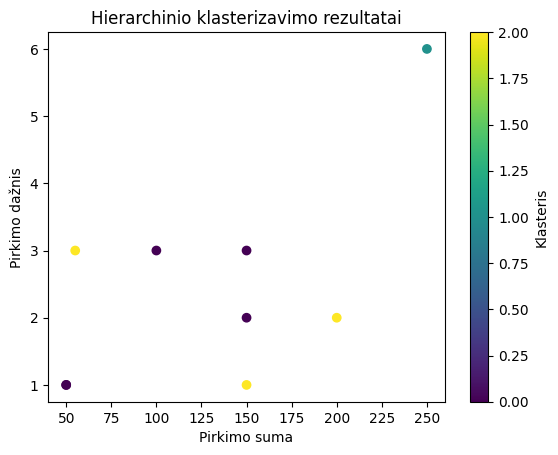

In [46]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Nuskaitome duomenis iš CSV failo
vartotojai = pd.read_csv('uzduotis1_data.csv')
vartotojai['suma'] = vartotojai['suma'].str.replace('€', '').astype(float)
label_encoder = LabelEncoder()
vartotojai['kategorija'] = label_encoder.fit_transform(vartotojai['kategorija'])
# Pašaliname nereikalingas stulpelių, jei tokių yra
# Šiuo atveju, jei stulpelis 'data' nėra svarbus klasterizavimui
vartotojai = vartotojai.drop('data', axis=1)

# Standartizuojame duomenis, kad visi jie būtų suvienodinti
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vartotojai)

# Inicializuojame hierarchinio klasterizavimo modelį
# Nurodome, kiek klasterių norime turėti
n_clusters = 3  # Galite pasirinkti norimą klasterių skaičių
model = AgglomerativeClustering(n_clusters=n_clusters)

# Atliekame klasterizavimą
clusters = model.fit_predict(scaled_data)

# Pridedame klasterių informaciją į pradinius duomenis
vartotojai['klasteris'] = clusters

# Atvaizduojame klasterizavimo rezultatus
plt.scatter(vartotojai['suma'], vartotojai['daznis'], c=vartotojai['klasteris'], cmap='viridis')
plt.xlabel('Pirkimo suma')
plt.ylabel('Pirkimo dažnis')
plt.title('Hierarchinio klasterizavimo rezultatai')
plt.colorbar(label='Klasteris')
plt.show()

## 2 Užduotis
Užduotis 2: K-vidurkių klasterizavimo užduotis

Duota gyventojų duomenų rinkinys, kuriame kiekvienas gyventojas yra nurodytas su jo amžiumi ir pajamomis. Užduotis yra suskirstyti gyventojus į klasterius pagal jų amžių ir pajamas.

Duomenų pavyzdys:

Gyventojas 1: {amžius: 35 metai, pajamos: 30000€}
Gyventojas 2: {amžius: 50 metai, pajamos: 45000€}
Gyventojas 3: {amžius: 25 metai, pajamos: 25000€}
ir tt.
Galimi sprendimo variantai:

Naudojant K-vidurkių klasterizavimą, gyventojai gali būti suskirstyti į klasterius pagal jų amžių ir pajamas.
Po klasterizavimo galima vizualizuoti klasterius ir jų centroidus, kad būtų lengviau interpretuoti gautus rezultatus.

In [37]:
import pandas as pd
import numpy as np
np.random.seed(0)
# vartotojai = range(1,51)
amzius =np.random.randint(20, 80, size=50)
pajamos = np.random.randint(20000, 80000, size=50)
data = {'amzius':amzius,'pajamos':pajamos}
df = pd.DataFrame(data)
df.to_csv('Duomenys2.csv', index=False)

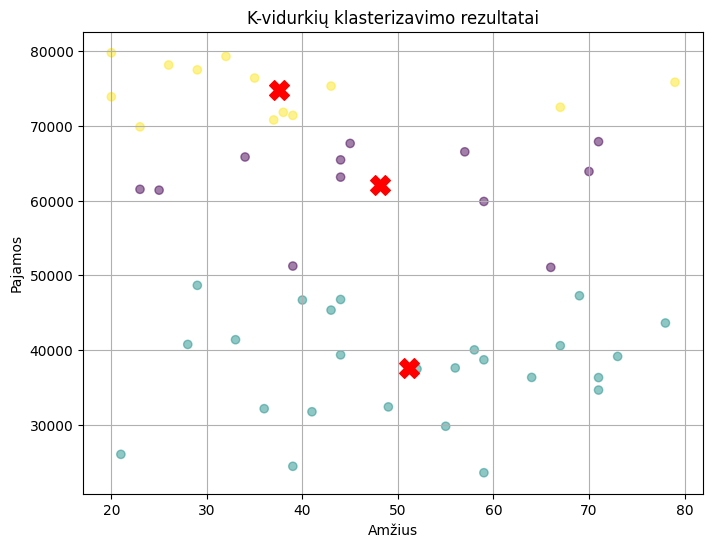

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Duomenų nuskaitymas
gyventojai = pd.read_csv('Duomenys2.csv')

# Paruošiame duomenis klasterizavimui
X = gyventojai[['amzius', 'pajamos']]

# Inicializuojame KMeans modelį
kmeans = KMeans(n_clusters=3) # Norimas klasterių skaičius

# Apmokome modelį
kmeans.fit(X)

# Gautos klasterių centrodų koordinatės
centroids = kmeans.cluster_centers_

# Priskiriame kiekvieną gyventoją klasteriui
gyventojai['klasteris'] = kmeans.labels_

# Vizualizuojame klasterizavimo rezultatus
plt.figure(figsize=(8, 6))
plt.scatter(gyventojai['amzius'], gyventojai['pajamos'], c=gyventojai['klasteris'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel('Amžius')
plt.ylabel('Pajamos')
plt.title('K-vidurkių klasterizavimo rezultatai')
# plt.legend()
plt.grid(True)
plt.show()

## 3 Užduotis

Duota GPS sekimo duomenų rinkinys, kuriame yra įrašyti automobilių judėjimo taškai miesto centre. Užduotis yra identifikuoti pagrindinius automobilių maršrutus pagal duomenų taškų tankumą.

Duomenų pavyzdys:

Taškas 1: {lat: 54.6789, lon: 25.2798, laikas: 2023-01-15 08:00:00}
Taškas 2: {lat: 54.6890, lon: 25.2900, laikas: 2023-01-15 08:10:00}
Taškas 3: {lat: 54.6830, lon: 25.2750, laikas: 2023-01-15 08:20:00}
ir tt.
Galimi sprendimo variantai:

Naudodami DBSCAN klasterizavimą, galima identifikuoti pagrindinius automobilių maršrutus miesto centre pagal taškų tankumą.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
# vartotojai = range(1,51)
lat =np.random.rand(20, 80, size=50)
lon = np.random.randint(20000, 80000, size=50)
data = {'amzius':amzius,'pajamos':pajamos}
df = pd.DataFrame(data)
df.to_csv('Duomenys2.csv', index=False)

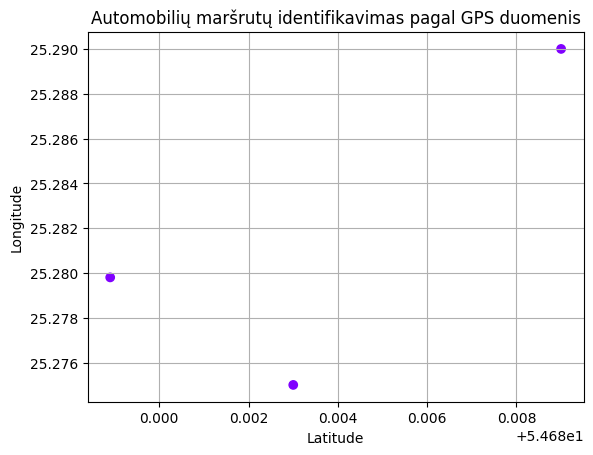

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Nuskaitome duomenis iš CSV failo
data = pd.read_csv('uzduotis3_data.csv')

# Paruošiame duomenis klasterizavimui, naudojant tik koordinates
X = data[['lat', 'lon']].values

# Standartizuojame duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializuojame DBSCAN modelį
# Eps nustato maksimalų atstumą tarp duomenų taškų, kad jie būtų laikomi kaimynais
# Min_samples nustato minimalų kaimynų skaičių, kuris yra reikalingas, kad taškas būtų laikomas pagrindiniu
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Atliekame klasterizavimą
clusters = dbscan.fit_predict(X_scaled)

# Atvaizduojame klasterizavimo rezultatus
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Automobilių maršrutų identifikavimas pagal GPS duomenis')
plt.grid()
plt.show()
